## Baseline Classifiers + Metrics

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

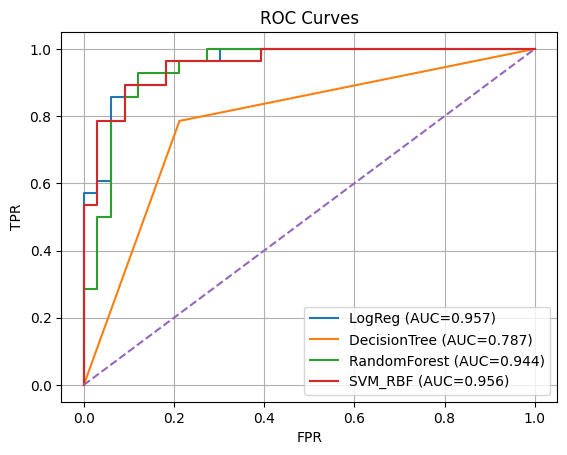

          Model  Accuracy  Precision    Recall        F1       AUC
0        LogReg  0.901639   0.901639  0.901639  0.901639  0.956710
3       SVM_RBF  0.885246   0.897222  0.885246  0.885246  0.955628
2  RandomForest  0.885246   0.885970  0.885246  0.885370  0.943723
1  DecisionTree  0.786885   0.787769  0.786885  0.787115  0.786797
Saved metrics to results/evaluation_metrics.txt


In [4]:
data = pd.read_csv('../data/selected_features.csv')
y = (data['target'] > 0).astype(int)
X = data.drop(columns=['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

models = {
    "LogReg": LogisticRegression(max_iter=2000),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=300, random_state=42),
    "SVM_RBF": SVC(kernel='rbf', probability=True, random_state=42)
}

results = []
plt.figure()
for name, clf in models.items():
    clf.fit(X_train, y_train)
    proba = clf.predict_proba(X_test)[:,1]
    preds = (proba >= 0.5).astype(int)

    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds,average="weighted", zero_division=0)
    rec = recall_score(y_test, preds,average="weighted", zero_division=0)
    f1 = f1_score(y_test, preds,average="weighted", zero_division=0)
    auc = roc_auc_score(y_test, proba, multi_class="ovr", average="weighted")

    fpr, tpr, _ = roc_curve(y_test, proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

    results.append([name, acc, prec, rec, f1, auc])

plt.plot([0,1],[0,1],'--')
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC Curves")
plt.legend(); plt.grid(True); plt.show()

res_df = pd.DataFrame(results, columns=["Model","Accuracy","Precision","Recall","F1","AUC"]).sort_values("AUC", ascending=False)
print(res_df)

res_path = Path('../results/evaluation_metrics.txt')
with open(res_path, 'w') as f:
    f.write(res_df.to_string(index=False))
print("Saved metrics to results/evaluation_metrics.txt")
